<a href="https://colab.research.google.com/github/neuroqudit/pykoppu/blob/main/notebooks/02_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KOPPU: Calibration & Mechanisms

This notebook demonstrates the fundamental calibration mechanisms of the KOPPU OPU. We will explore how different coupling configurations (Excitatory vs. Inhibitory) affect the dynamics of the neural network.

**Objectives:**
1.  **Excitatory Model**: Demonstrate synchronization/correlation.
2.  **Inhibitory Model**: Demonstrate competition/anti-correlation.
3.  **Mixed Model**: Demonstrate complex dynamics.

## 1. Initialization

We begin by initializing the OPU with a capacity of 50 neurons and connecting the CPU driver. This sets up the simulation environment.

In [1]:
!pip install pykoppu==0.2.34a0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.7 MB/s eta 0:00:00


In [2]:
import pykoppu as pk
import numpy as np
from pykoppu.biocompiler.isa import Instruction, OpCode
from pykoppu.oos.result import SimulationResult
import matplotlib.pyplot as plt

# Initialize OPU and Driver
print("Initializing OPU...")
opu = pk.opu.OPU(capacity=50)
driver = pk.electrophysiology.connect("cpu", opu)
driver.connect()

Initializing OPU...


## 2. Excitatory Model (Ferromagnetic)

In this configuration, we couple two neurons with a **positive** weight ($J > 0$). This should encourage them to fire together (synchronize).

Running Excitatory Model...


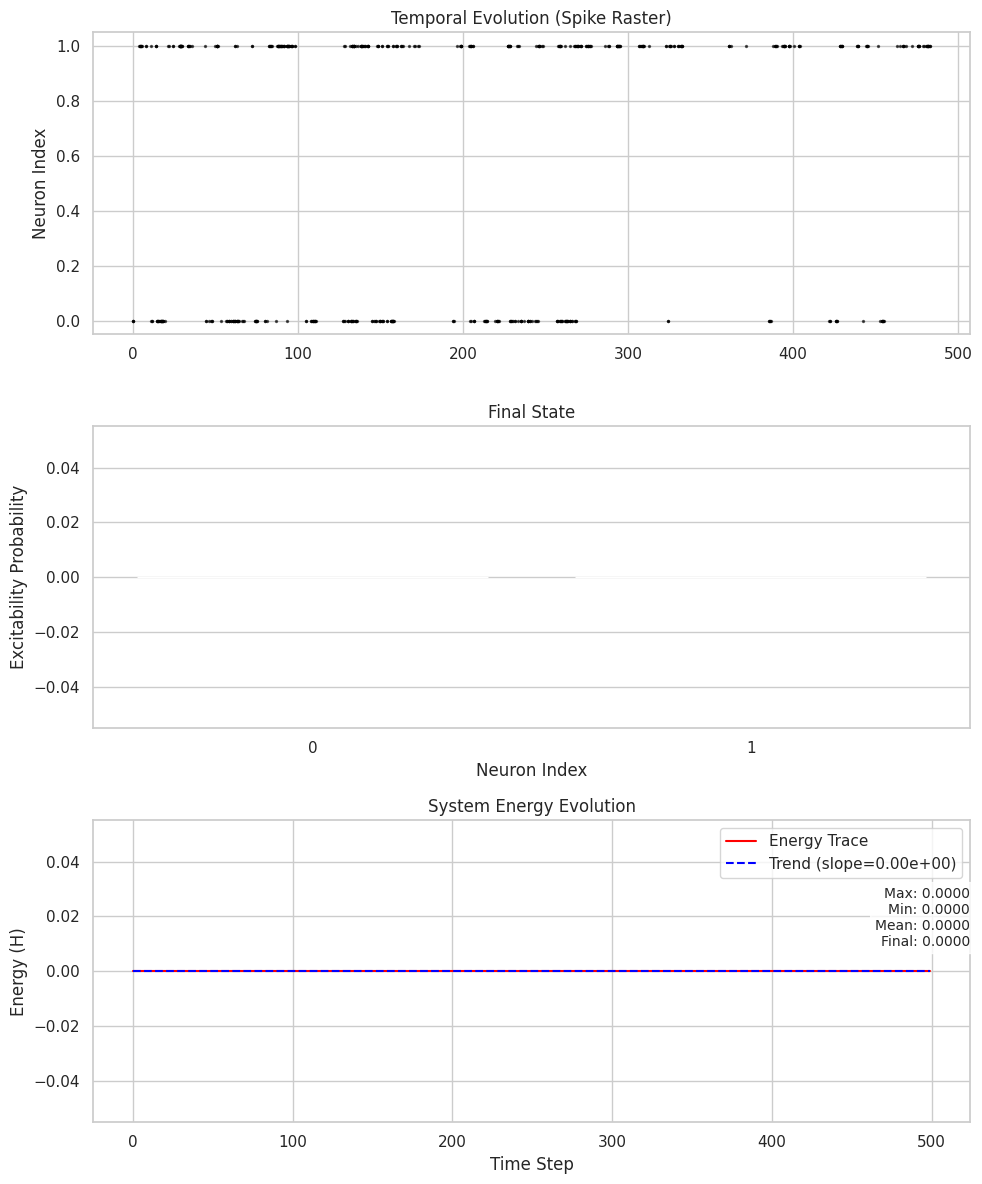

In [3]:
# Define Program for Excitatory Model
program_excitatory = [
    Instruction(OpCode.ALC, [2]),           # Allocate 2 neurons
    Instruction(OpCode.LDJ, [[[0, 1],       # J_01 = 1 (Excitatory)
                              [1, 0]]]),    # J_10 = 1
    Instruction(OpCode.LDH, [[0, 0]]),      # No bias
    Instruction(OpCode.SIG, [2.0]),         # Moderate noise
    Instruction(OpCode.RUN, [0.5]),         # Run for 500ms
    Instruction(OpCode.RD, [])              # Read state
]

print("Running Excitatory Model...")
state_exc, energy_exc, spikes_exc = driver.execute(program_excitatory)

# Visualize
result_exc = SimulationResult(
    solution=state_exc,
    energy_history=energy_exc,
    spikes=spikes_exc,
    metadata={"description": "Excitatory Model (J=1)"}
)
result_exc.plot()

## 3. Inhibitory Model (Antiferromagnetic)

Here, we couple two neurons with a **negative** weight ($J < 0$). This should encourage them to fire at different times (competition/anti-synchronization).

Running Inhibitory Model...


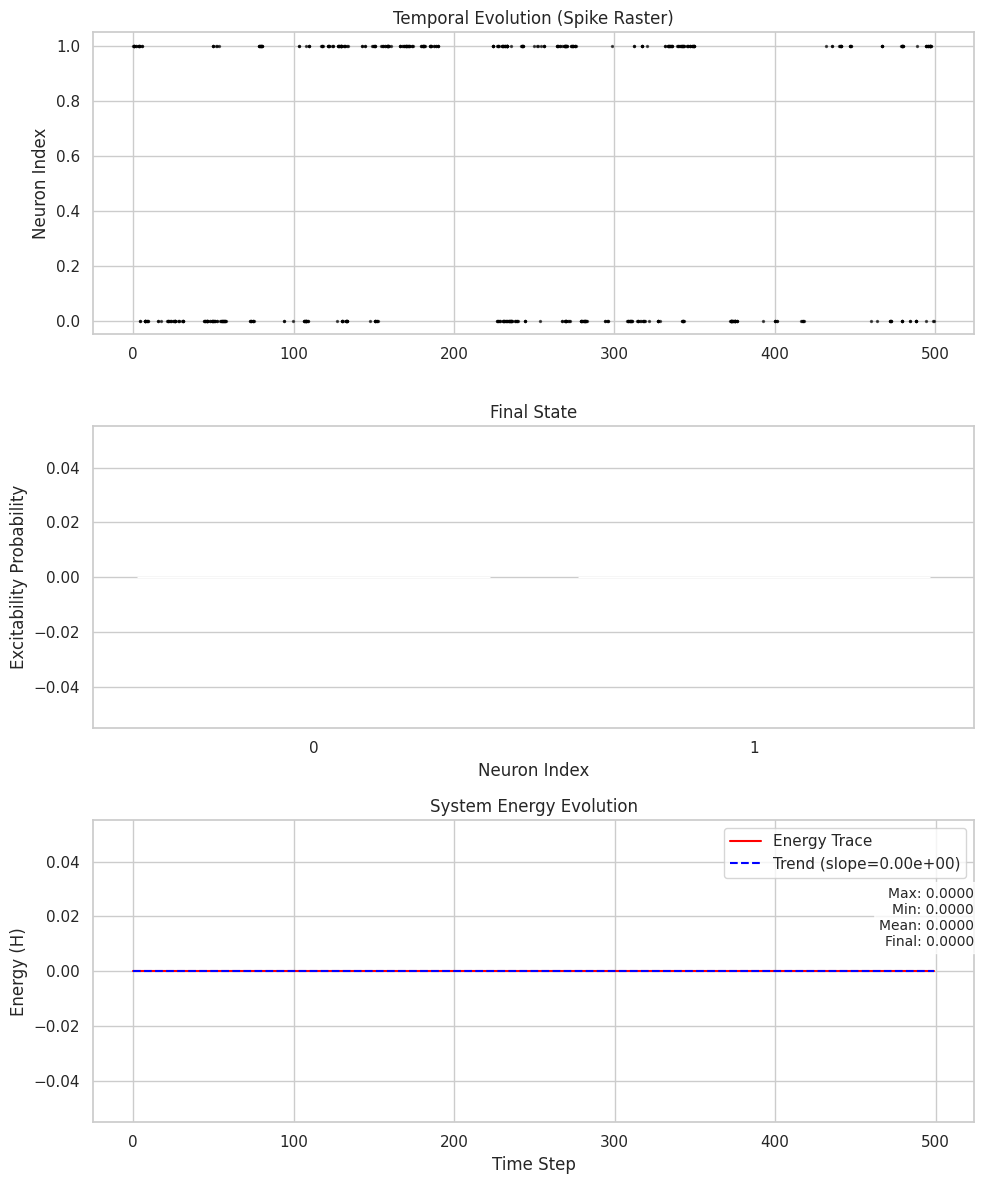

In [4]:
# Define Program for Inhibitory Model
program_inhibitory = [
    Instruction(OpCode.ALC, [2]),           # Allocate 2 neurons
    Instruction(OpCode.LDJ, [[[0, -1],      # J_01 = -1 (Inhibitory)
                              [-1, 0]]]),   # J_10 = -1
    Instruction(OpCode.LDH, [[0, 0]]),      # No bias
    Instruction(OpCode.SIG, [2.0]),         # Moderate noise
    Instruction(OpCode.RUN, [0.5]),         # Run for 500ms
    Instruction(OpCode.RD, [])              # Read state
]

print("Running Inhibitory Model...")
state_inh, energy_inh, spikes_inh = driver.execute(program_inhibitory)

# Visualize
result_inh = SimulationResult(
    solution=state_inh,
    energy_history=energy_inh,
    spikes=spikes_inh,
    metadata={"description": "Inhibitory Model (J=-1)"}
)
result_inh.plot()

## 4. Mixed Model (Excitatory/Inhibitory)

We create a small network of 3 neurons with mixed interactions to observe more complex dynamics.
- Neuron 0 excites Neuron 1 ($J_{01} = 1$)
- Neuron 1 inhibits Neuron 2 ($J_{12} = -1$)
- Neuron 2 excites Neuron 0 ($J_{20} = 1$)

Running Mixed Model...


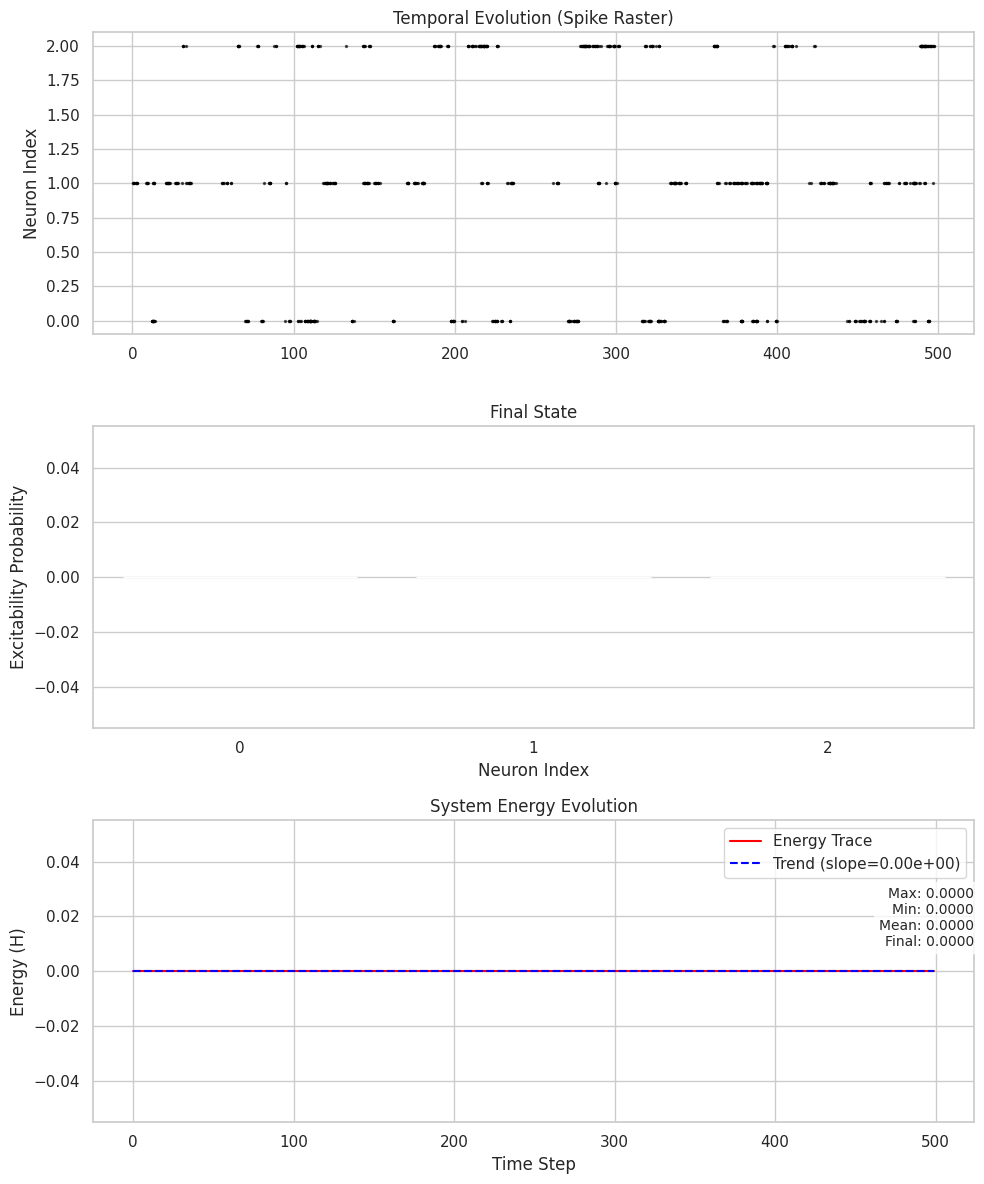

In [5]:
# Define Program for Mixed Model
program_mixed = [
    Instruction(OpCode.ALC, [3]),           # Allocate 3 neurons
    Instruction(OpCode.LDJ, [[[0,  1,  0],  # 0->1 (+)
                              [1,  0, -1],  # 1->2 (-)
                              [1,  0,  0]]]), # 2->0 (+)
    Instruction(OpCode.LDH, [[0, 0, 0]]),   # No bias
    Instruction(OpCode.SIG, [2.0]),         # Moderate noise
    Instruction(OpCode.RUN, [0.5]),         # Run for 500ms
    Instruction(OpCode.RD, [])              # Read state
]

print("Running Mixed Model...")
state_mix, energy_mix, spikes_mix = driver.execute(program_mixed)

# Visualize
result_mix = SimulationResult(
    solution=state_mix,
    energy_history=energy_mix,
    spikes=spikes_mix,
    metadata={"description": "Mixed Model"}
)
result_mix.plot()

## 5. Cleanup

Always disconnect the driver to free up resources.

In [ ]:
# Cleanup
driver.disconnect()